# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
import pandas as pd
#from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.base import TransformerMixin
#from sklearn.preprocessing import StandardScaler, Normalizer
#from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
#from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes


# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [2]:
# Your code here:

diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [3]:
# Your code here:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [4]:
# Your code here:
print(diabetes.get("DESCR"))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [5]:
# Enter your answer here:

#1) Ten variables: age, sex, body mass index, average blood\npressure,six blood serum measurements and the response of interest--> features.

#2) diabetes['target'] shows the values for the variables after one year --> Ground truth

print(f"size of diabetes['data']:  {diabetes['data'].shape}")


size of diabetes['data']:  (442, 10)


#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [6]:
# Your code here:
print(f"size of diabetes['data']:  {diabetes['data'].shape}")
print(f"size of diabetes['target']:  {diabetes['target'].shape}")
# The size corresponds to the number of Instances (442) described in the description


size of diabetes['data']:  (442, 10)
size of diabetes['target']:  (442,)


# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [7]:
# Your code here:
from sklearn import linear_model

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [8]:
# Your code here:

diabetes0 = linear_model.LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [9]:
# Your code here:
from sklearn.model_selection import train_test_split

X = diabetes["data"]
y = diabetes["target"]
X_train = diabetes["data"][0:-20]
X_test = diabetes["data"][-20:]
y_train = diabetes["target"][0:-20]
y_test = diabetes["target"][-20:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [10]:
# Your code here:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg

print(f"Coef: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")


Coef: [ -11.17528718 -253.0121487   550.47235034  304.5956907  -955.0865036
  594.87305984  227.29169331  280.13222589  823.20103688   50.90578911]
Intercept: 154.80960404081736


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [11]:
# Your code here:
y_pred = reg.predict(X_test)
y_pred

array([ 93.6845801 , 231.33006318, 208.60853771, 137.1385866 ,
        82.93167836,  81.99406661, 235.01391234, 145.64794119,
        99.33774896, 186.43157685,  52.39279103, 159.51036155,
        72.33188499,  95.09383902, 104.18783408, 154.83401759,
       140.47316218, 123.04892265, 151.55097802, 247.65636137,
       150.2287326 ,  33.13129311, 134.20301058, 237.17830814,
        65.19287976,  79.08377708, 175.72434444, 200.32501965,
       152.70752297,  96.2935756 ,  67.53674193, 279.44771919,
       182.26516281,  45.99734098, 160.8956547 , 151.05774003,
       113.30718519, 116.40430075,  84.44646719,  93.63652449,
       133.21609717, 155.11225732, 100.70790955, 293.67571604,
       125.07949808,  94.73947798, 212.98726816, 217.14376188,
        79.33612063,  76.41850393, 143.44894049, 101.37442713,
       239.24489109, 171.88418931, 255.15843012, 220.85198498,
       212.33343222, 123.65116675, 130.58766587, 120.0022931 ,
       184.70826482,  88.60586339, 142.04299   ,  73.90

#### Print your `diabetes_target_test` and compare with the prediction. 

In [12]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,115.0,93.684580
1,237.0,231.330063
2,151.0,208.608538
3,148.0,137.138587
4,71.0,82.931678
...,...,...
84,122.0,200.765620
85,262.0,162.747624
86,263.0,262.181950
87,225.0,231.128708


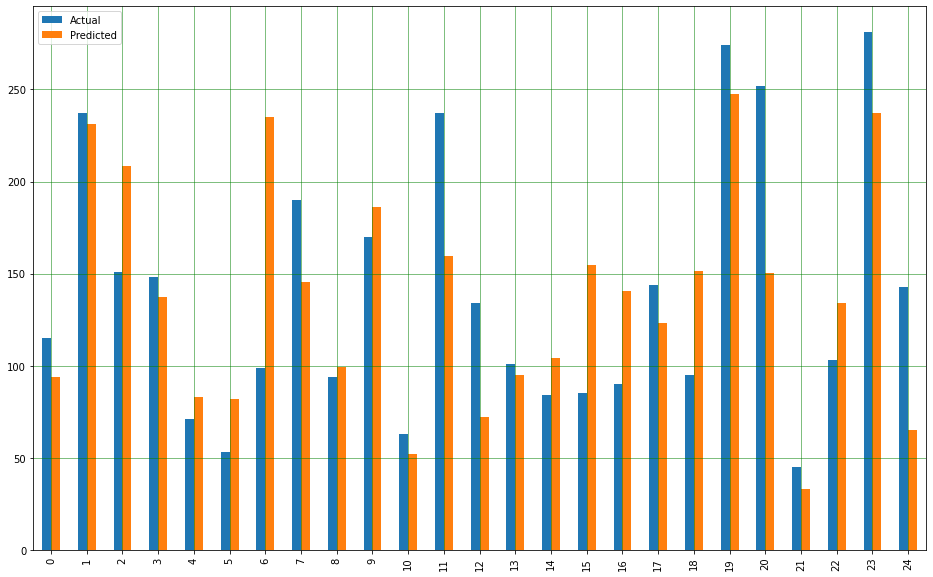

In [13]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

In [14]:
# Your explanation here:
# we evaluatethe performance of the algorithm by finding the values for MAE, MSE, and RMSE

from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 46.07160351810044
Mean Squared Error: 3384.80107879816
Root Mean Squared Error: 58.17904329565896


# Bonus Challenge 1 - Hypothesis Testing with `statsmodels`

After generating the linear regression model from the dataset, you probably wonder: then what? What is the statistical way to know if my model is reliable or not?

Good question. We'll discuss that using Scikit-Learn in Challenge 5. But for now, let's use a fool-proof way by using the ([Linear Regression class of StatsModels](https://www.statsmodels.org/dev/regression.html)) which can also conduct linear regression analysis plus much more such as calcuating the F-score of the linear model as well as the standard errors and t-scores for each coefficient. The F-score and t-scores will tell you whether you can trust your linear model.

To understand the statistical meaning of conducting hypothesis testing (e.g. F-test, t-test) for slopes, read [this webpage](https://onlinecourses.science.psu.edu/stat501/node/297/) at your leisure time. We'll give you a brief overview next.

* The F-test of your linear model is to verify whether at least one of your coefficients is significantly different from zero. Translating that into the *null hypothesis* and *alternative hypothesis*, that is:

    ```
    H0 : β1 = β2 = ... = β10 = 0
    HA : At least one βj ≠ 0 (for j = 1, 2, ..., 10)
    ```

* The t-tests on each coefficient is to check whether the confidence interval for the variable contains zero. If the confidence interval contains zero, it means the null hypothesis for that variable is not rejected. In other words, this particular vaiable is not contributing to your linear model and you can remove it from your formula.

Read the documentations of [StatsModels Linear Regression](https://www.statsmodels.org/dev/regression.html) as well as its [`OLS` class](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) which stands for *ordinary least squares*.

#### In the next cell, analyze `diabetes_data_train` and `diabetes_target_train` with the linear regression model of `statsmodels`. Print the fit summary.

Your output should look like:

![statsmodels regression](../statsmodels.png)

#### Interpreting hypothesis testing results

Answer the following questions in the cell below:

1. What is the F-score of your linear model and is the null hypothesis rejected?

1. Does any of the t-tests of the coefficients produce a confidence interval containing zero? What are they?

1. How will you modify your linear reguression model according to the test results above?

In [15]:
# Your answers here:

# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [16]:
# Your code here:
auto = pd.read_csv("../auto-mpg.csv")

Look at the first 5 rows using the `head()` function:

In [17]:
# Your code here:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [18]:
# Your code here:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object

What is the newest model year and the oldest model year?

In [19]:
# Your code here:
print(f"Newest model year: { min(auto['model_year']) }")
print(f"Newest model year: {max(auto['model_year'])}")


Newest model year: 70
Newest model year: 82


Check the dataset for missing values and remove all rows containing at least one missing value.

In [20]:
# Your code here:
null_cols = auto.isnull().sum()
null_cols

mpg             0
cylinders       0
displacement    0
horse_power     6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

In [21]:
auto_clean = auto.dropna(axis='columns')
auto_clean

,mpg,cylinders,displacement,weight,acceleration,model_year,car_name
0,18.0,8,307.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,3449,10.5,70,"\t""ford torino"""
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,"\t""ford mustang gl"""
394,44.0,4,97.0,2130,24.6,82,"\t""vw pickup"""
395,32.0,4,135.0,2295,11.6,82,"\t""dodge rampage"""
396,28.0,4,120.0,2625,18.6,82,"\t""ford ranger"""


Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [22]:
# Your code here:
auto_clean["cylinders"].value_counts() #There are five possible values

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [23]:
# Your code here:
#we drop de car_name columns
auto_clean = auto_clean.drop(["car_name"],axis=1)

In [24]:
print(f"Train size: {round(len(auto_clean['mpg'])*0.8)}")
print(f"Test size: {round(len(auto_clean['mpg'])*0.2)}")

# separamos la columna de mpg (gorund truth)

auto_ft = ['cylinders', 'displacement', 'horse_power', 'weight',
       'acceleration', 'model_year']
X = auto[auto_ft]
y = auto["mpg"]

# separamos la parte de Train y de Test

X_train = auto[auto_ft][0:318]
X_test = auto[auto_ft][318:]
y_train = auto["mpg"][0:318]
y_test = auto["mpg"][318:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train, X_test, y_train, y_test )

Train size: 318
Test size: 80
     cylinders  displacement  horse_power  weight  acceleration  model_year
51           4          79.0         70.0    2074          19.5          71
348          4          89.0         62.0    2050          17.3          81
375          4         105.0         74.0    1980          15.3          82
222          8         260.0        110.0    4060          19.0          77
283          6         232.0         90.0    3265          18.2          79
..         ...           ...          ...     ...           ...         ...
214          8         302.0        130.0    3870          15.0          76
274          5         131.0        103.0    2830          15.9          78
4            8         302.0        140.0    3449          10.5          70
88           8         302.0        137.0    4042          14.5          73
14           4         113.0         95.0    2372          15.0          70

[318 rows x 6 columns]      cylinders  displacement  hors

Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [25]:
auto_clean.dtypes

mpg             float64
cylinders         int64
displacement    float64
weight            int64
acceleration    float64
model_year        int64
dtype: object

In [29]:
# Your code here:
auto_model = linear_model.LinearRegression()


In [ ]:
train = auto_model.fit(X_train,y_train)


# Challenge 4 - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](). Its formula is:

![R Squared](../r-squared.png)

...where:

* yi is an actual data point.
* ŷi is the corresponding data point on the estimated regression line.

By adding the squares of the difference between all yi-ŷi pairs, we have a measure called SSE (*error sum of squares*) which is an application of the r squared score to indicate the extent to which the estimated regression model is different from the actual data. And we attribute that difference to the random error that is unavoidable in the real world. Obviously, we want the SSE value to be as small as possible.

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [35]:
# Your code here:
from sklearn.metrics import r2_score
y_true
y_pred 
r2_score(y_true, y_pred, multioutput='variance_weighted')

#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [ ]:
# Your code here:


#### Explaining the results

The r squared scores of the training data and the test data are pretty close (0.8146 vs 0.7818). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [ ]:
# Your code here:


Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [ ]:
# Your code here:


Compute the predicted values and r squared score for our new model and new sample data.

In [ ]:
# Your code here:


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [ ]:
# Your code here:


# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [ ]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [ ]:
# Your code here:


Fit the model and print the ranking

In [ ]:
# Your code here:


Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [ ]:
# Your code here:


Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [ ]:
# Your code here: 


#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.